In [30]:
import torch
import cupy as cp
from cupyx.profiler import benchmark

import cupy as cp
import numpy as np

import torch

import matplotlib.pyplot as plt

import cupyx.scipy.fft as cufft
import scipy.fft
scipy.fft.set_global_backend(cufft)

[ -244.461221    -155.02724877 -1053.90615397 ...   713.16674472
   124.94625288  -733.50579583]


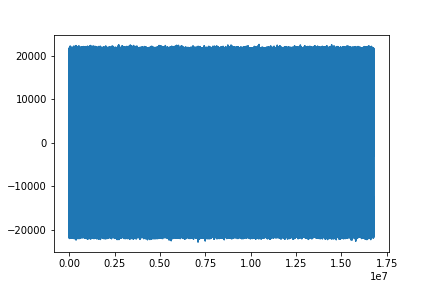

In [47]:
a = cp.random.randint(low=-2**16, high=2**16, size=2**24)
a = cp.random.normal(loc=0, scale=500, size=2**24)
a.astype('float32')
print(a)

time            = np.linspace(0,2**24/1.25e9,2**24)
arr             = 20300*np.sin(2*np.pi*time*19.7562e6)
a               = cp.asarray(arr) + a

a_torch = torch.as_tensor(a, dtype=torch.int16, device='cuda')

def fft(tensor):
    return torch.abs(torch.fft.rfft(tensor))

def fft_cu(array):
    return cp.abs(cp.fft.rfft(array))

def fft_abs_sq(tensor):
    return torch.pow(torch.abs(torch.fft.rfft(tensor)),2)

def fft_conj(tensor):
    fft_raw = torch.fft.rfft(tensor)
    return fft_raw*torch.conj(fft_raw)

plt.close('all')
plt.figure()
plt.plot(a.get())

In [48]:
print(benchmark(fft, (a_torch,),n_repeat=500))
print(benchmark(fft_cu, (a,),n_repeat=500))

fft                 :    CPU:   44.182 us   +/- 9.433 (min:   39.299 / max:  110.548) us     GPU-0: 1316.781 us   +/- 9.323 (min: 1302.144 / max: 1396.736) us
fft_cu              :    CPU:   39.219 us   +/- 7.077 (min:   36.949 / max:  179.847) us     GPU-0: 6811.777 us   +/-10382.596 (min: 5652.480 / max:130155.518) us


In [49]:
print(benchmark(fft_abs_sq, (a_torch,),n_repeat=5000))
print(benchmark(fft_conj, (a_torch,),n_repeat=5000))

fft_abs_sq          :    CPU:   50.297 us   +/- 4.412 (min:   47.219 / max:  268.646) us     GPU-0: 1420.275 us   +/-16.583 (min: 1400.672 / max: 1974.240) us
fft_conj            :    CPU:   41.944 us   +/- 4.289 (min:   39.560 / max:  307.706) us     GPU-0: 1489.912 us   +/-1680.392 (min: 1445.344 / max:120295.395) us


/home/dradmin/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


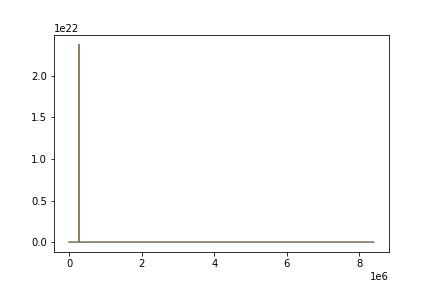

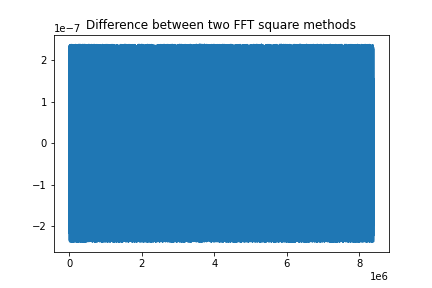

In [51]:
plt.close('all')
%matplotlib widget
plt.plot(np.asarray(fft_conj(a_torch).cpu()))
plt.plot(np.asarray((fft_abs_sq(a_torch).cpu())), alpha = .5)

plt.figure()
plt.title('Difference between two FFT square methods')
plt.plot((np.asarray(fft_conj(a_torch).cpu())-np.asarray((fft_abs_sq(a_torch).cpu())))/(np.asarray(fft_conj(a_torch).cpu())))

In [57]:
%%timeit -n 500
fft(a_torch)
torch.cuda.synchronize()

1.31 ms ± 524 ns per loop (mean ± std. dev. of 7 runs, 500 loops each)
